In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

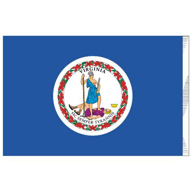

In [3]:
im = PILImage.create('virginia.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('us_flag_classifier_model.pkl')

In [5]:
%time learn.predict(im)

CPU times: user 146 ms, sys: 24.2 ms, total: 170 ms
Wall time: 62 ms


('Virginia',
 TensorBase(51),
 TensorBase([2.4324e-04, 3.2692e-04, 2.7230e-04, 9.8717e-05, 1.7264e-04,
             3.7322e-05, 1.5884e-04, 7.1611e-04, 3.7362e-05, 2.5848e-04,
             2.5484e-04, 9.4434e-06, 5.3560e-03, 3.8893e-04, 3.2906e-03,
             6.0684e-05, 1.3504e-04, 2.8878e-03, 2.7466e-03, 4.7643e-04,
             2.5224e-04, 7.1959e-03, 2.4807e-04, 2.1605e-04, 6.3929e-05,
             7.4255e-02, 3.9130e-04, 2.3757e-02, 6.6141e-03, 2.8289e-04,
             5.9384e-05, 7.2102e-04, 2.0143e-05, 5.2313e-05, 1.4563e-05,
             3.5465e-05, 6.8503e-06, 1.3420e-03, 3.5132e-05, 5.3813e-04,
             3.9269e-05, 6.8339e-03, 3.5217e-05, 1.3791e-04, 6.2349e-05,
             3.0587e-03, 3.5639e-05, 8.6754e-06, 2.9960e-05, 6.8606e-04,
             2.2120e-04, 8.3217e-01, 6.7605e-04, 2.1150e-02, 4.0541e-04,
             4.1559e-04]))

In [6]:
learn.dls.vocab

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [7]:
#|export
def classify_image(img):
    pred, pred_idx, probs =  learn.predict(img) 
    return dict(zip(learn.dls.vocab, map(float,probs)))

In [8]:
#|export
image = gr.components.Image(shape=(192,192))
label = gr.components.Label(num_top_classes=5)
examples = ['california.jpg','virginia.jpg','unnamed.jpg']

iface = gr.Interface(fn=classify_image,inputs=image,outputs=label, examples=examples)
iface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x14bc7eef0>, 'http://127.0.0.1:7860/', None)

In [9]:
from nbdev.export import nb_export

In [12]:
nb_export('app.ipynb', lib_path=Path('.'))